In [5]:
from tools import heatmap_eval, UMAP_eval, eval_classifier, vis_classifier
import pandas as pd
import numpy as np

## RNABRCASubtype, CVAE1-150, generated 500 each, quality evaluation

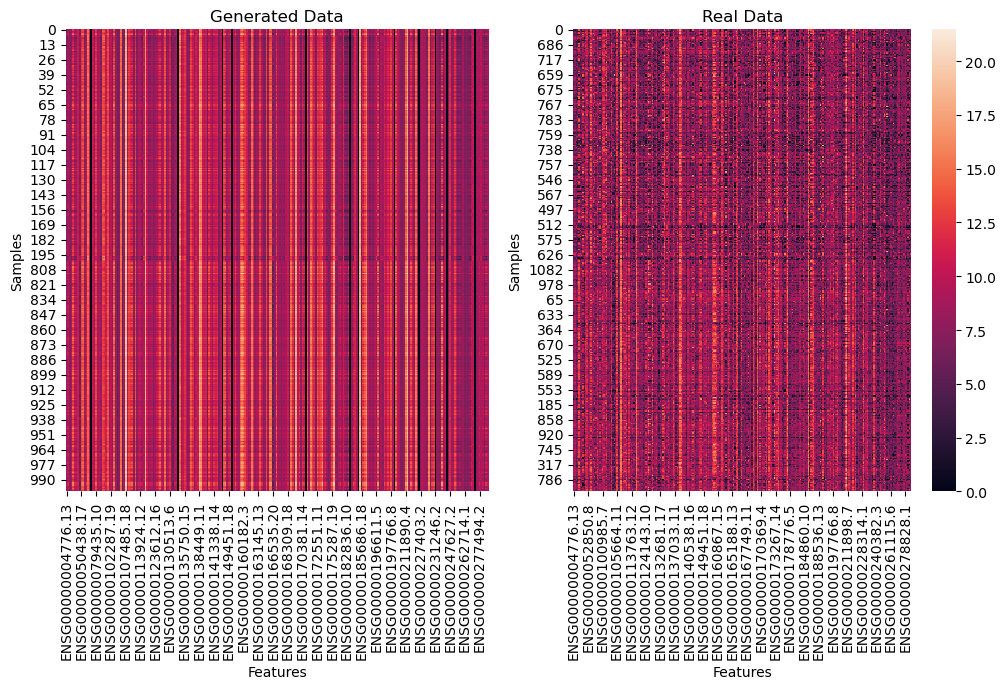

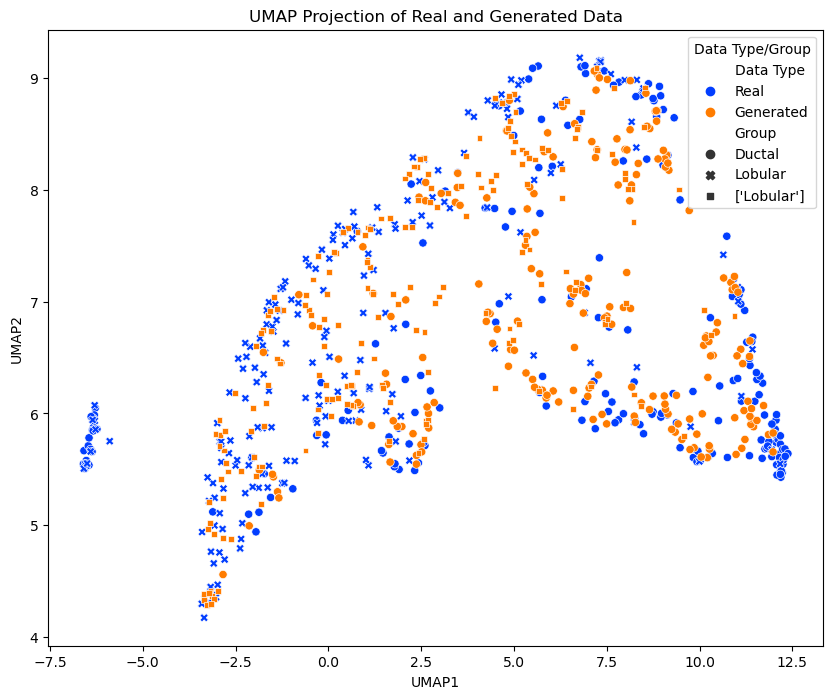

In [6]:
# Read in data
generated = pd.read_csv("ExampleData/RNABRCASubtypeSel258_epochES_CVAE1-150_generated.csv", header=None)
real = pd.read_csv("ExampleData/RNABRCASubtypeSel258.csv")

# Define the default group level
level0 = real['groups'].iloc[0]
level1 = list(set(real['groups']) - set([level0]))

# Get sample groups
real = real.sort_values(by=['groups'])
groups_real = real['groups']
groups_generated = generated.iloc[:, -1].apply(lambda x: level0 if x == 0 else level1)

# Get pure data matrices
real_numeric = real.select_dtypes(include=[np.number])
real_numeric = np.log2(real_numeric + 1)
generated = generated.iloc[:, :real_numeric.shape[1]]
generated.columns = real_numeric.columns

# Select samples for analysis to save running time
real_ind = list(range(200)) + list(range(len(real_numeric) - 200, len(real_numeric)))
generated_ind = list(range(200)) + list(range(len(generated) - 200, len(generated)))

# Call evaluation functions
h_subtypes = heatmap_eval(dat_real = real_numeric.iloc[real_ind,], dat_generated = generated.iloc[generated_ind,])
p_umap_subtypes = UMAP_eval(dat_real = real_numeric.iloc[real_ind,],
                            dat_generated = generated.iloc[generated_ind,],
                            groups_real = groups_real.iloc[real_ind],
                            groups_generated = groups_generated.iloc[generated_ind],
                            legend_pos = "bottom")


## RNABRCASubtype classification accurary multiple classifier

In [7]:
np.random.seed(333)

n_candidate = np.arange(100, 401, 25)  


n_target = np.arange(410, 431, 10)  

# Evaluate the classifier for generated data
metric_generated = eval_classifier(whole_generated=generated,
                                   whole_groups=groups_generated,
                                   n_candidate=n_candidate,
                                   n_draw=2, log=True)

# Evaluate the classifier for real data
metric_real = eval_classifier(whole_generated=real,
                              whole_groups=groups_real,
                              n_candidate=n_candidate,
                              n_draw=2, log=True)



100
0 LOGIS scores are clean and numeric: [0.96 0.74 0.94 0.92 0.86]
SVM scores are clean and numeric: [0.83 0.64 0.74 0.9  0.72]
KNN scores are clean and numeric: [0.775 0.585 0.8   0.795 0.745]
RF scores are clean and numeric: [0.855 0.655 0.81  0.775 0.685]
XGB scores are clean and numeric: [0.88 0.49 0.78 0.94 0.71]
1 LOGIS scores are clean and numeric: [0.89 0.92 1.   0.79 0.9 ]
SVM scores are clean and numeric: [0.73 0.69 0.94 0.81 0.83]
KNN scores are clean and numeric: [0.73  0.76  0.96  0.755 0.82 ]
RF scores are clean and numeric: [0.625 0.75  0.93  0.775 0.84 ]
XGB scores are clean and numeric: [0.6   0.75  0.93  0.815 0.84 ]
125
0 LOGIS scores are clean and numeric: [0.89102564 0.96794872 0.94230769 0.90384615 0.90277778]
SVM scores are clean and numeric: [0.92948718 0.91025641 0.84615385 0.82051282 0.81944444]
KNN scores are clean and numeric: [0.90705128 0.77884615 0.84935897 0.75641026 0.84375   ]
RF scores are clean and numeric: [0.92307692 0.86217949 0.8974359  0.81730

0 LOGIS scores are clean and numeric: [0.98612245 0.96897959 0.94122449 0.99265306 0.9877551 ]
SVM scores are clean and numeric: [0.93387755 0.90040816 0.86612245 0.94693878 0.94122449]
KNN scores are clean and numeric: [0.90489796 0.85387755 0.84734694 0.9077551  0.94040816]
RF scores are clean and numeric: [0.90857143 0.87102041 0.85387755 0.90857143 0.95673469]
XGB scores are clean and numeric: [0.92653061 0.90857143 0.87632653 0.95673469 0.94938776]
1 LOGIS scores are clean and numeric: [0.95428571 0.93061224 0.96979592 0.96816327 0.96      ]
SVM scores are clean and numeric: [0.84816327 0.87918367 0.92571429 0.92       0.84653061]
KNN scores are clean and numeric: [0.82285714 0.82938776 0.86979592 0.85591837 0.80244898]
RF scores are clean and numeric: [0.84244898 0.86938776 0.91142857 0.90122449 0.83795918]
XGB scores are clean and numeric: [0.88979592 0.91102041 0.88816327 0.92       0.85142857]
375
0 LOGIS scores are clean and numeric: [0.93669986 0.96443812 0.96301565 0.968705

1 LOGIS scores are clean and numeric: [1. 1. 1. 1. 1.]
SVM scores are clean and numeric: [0.91333333 0.97555556 0.94444444 0.95666667 0.92666667]
KNN scores are clean and numeric: [0.86444444 0.90277778 0.88944444 0.90222222 0.87555556]
RF scores are clean and numeric: [1. 1. 1. 1. 1.]
XGB scores are clean and numeric: [1. 1. 1. 1. 1.]
325
0 LOGIS scores are clean and numeric: [1. 1. 1. 1. 1.]
SVM scores are clean and numeric: [0.94507576 0.89109848 0.96496212 0.90625    0.94433594]
KNN scores are clean and numeric: [0.88352273 0.85464015 0.8844697  0.8655303  0.86181641]
RF scores are clean and numeric: [1. 1. 1. 1. 1.]
XGB scores are clean and numeric: [1. 1. 1. 1. 1.]
1 LOGIS scores are clean and numeric: [1. 1. 1. 1. 1.]
SVM scores are clean and numeric: [0.96212121 0.95643939 0.95549242 0.96306818 0.87304688]
KNN scores are clean and numeric: [0.87452652 0.91335227 0.90861742 0.90104167 0.85107422]
RF scores are clean and numeric: [1. 1. 1. 1. 1.]
XGB scores are clean and numeric:

LOGIS
0     0.821032
1     0.840944
2     0.854319
3     0.863933
4     0.871183
5     0.876848
6     0.881399
7     0.885136
8     0.888261
9     0.890914
10    0.893194
11    0.895175
12    0.896913
Name: predicted, dtype: float64
0     100
1     125
2     150
3     175
4     200
5     225
6     250
7     275
8     300
9     325
10    350
11    375
12    400
Name: n, dtype: int64
SVM
0     0.817132
1     0.825660
2     0.832627
3     0.838518
4     0.843620
5     0.848121
6     0.852146
7     0.855788
8     0.859112
9     0.862170
10    0.865001
11    0.867637
12    0.870102
Name: predicted, dtype: float64
0     100
1     125
2     150
3     175
4     200
5     225
6     250
7     275
8     300
9     325
10    350
11    375
12    400
Name: n, dtype: int64
0     0.723722
1     0.744747
2     0.758701
3     0.768632
4     0.776057
5     0.781816
6     0.786412
7     0.790164
8     0.793285
9     0.795920
10    0.798176
11    0.800127
12    0.801833
Name: predicted, dtype: float64
0    

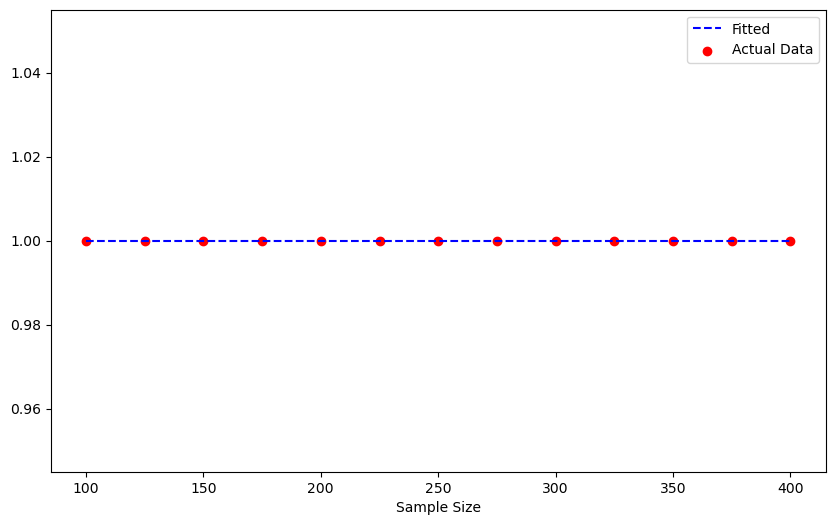

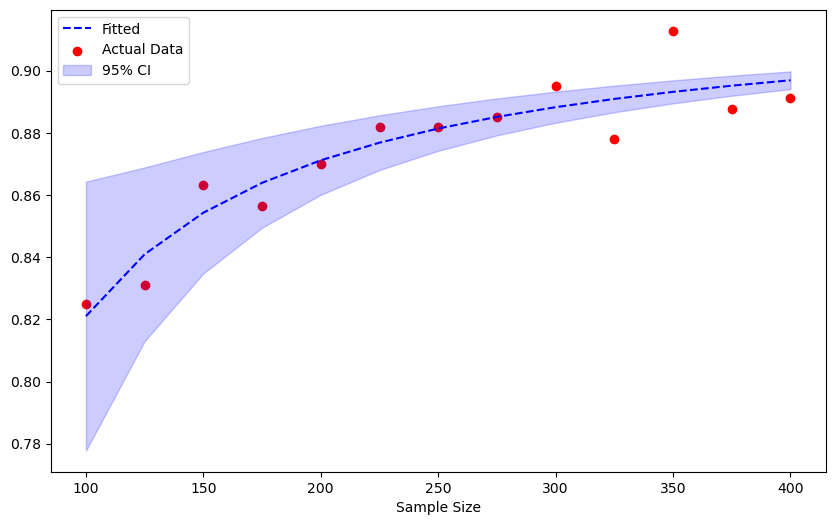

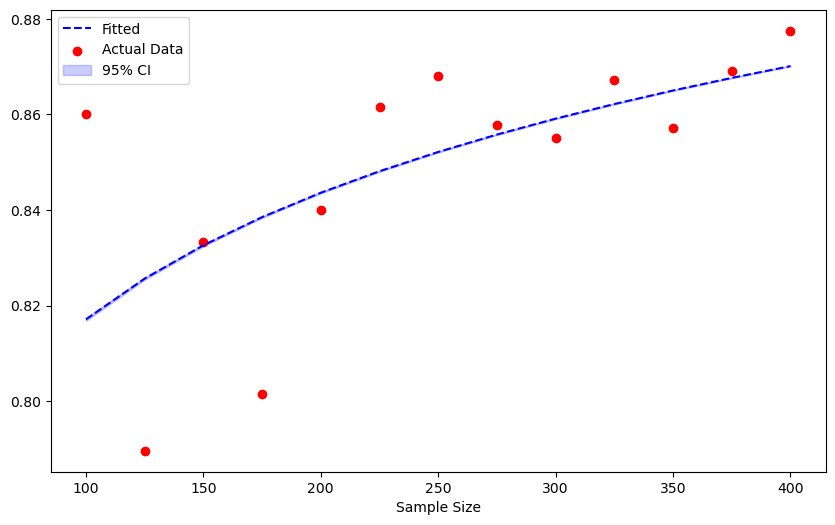

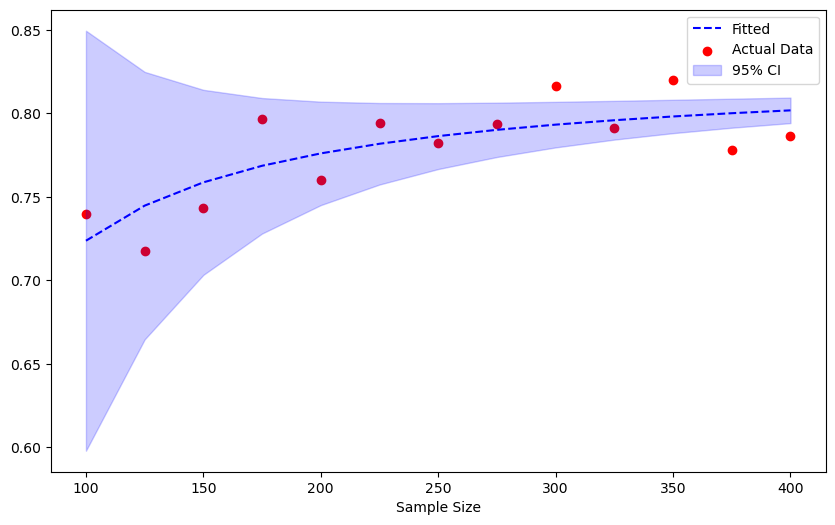

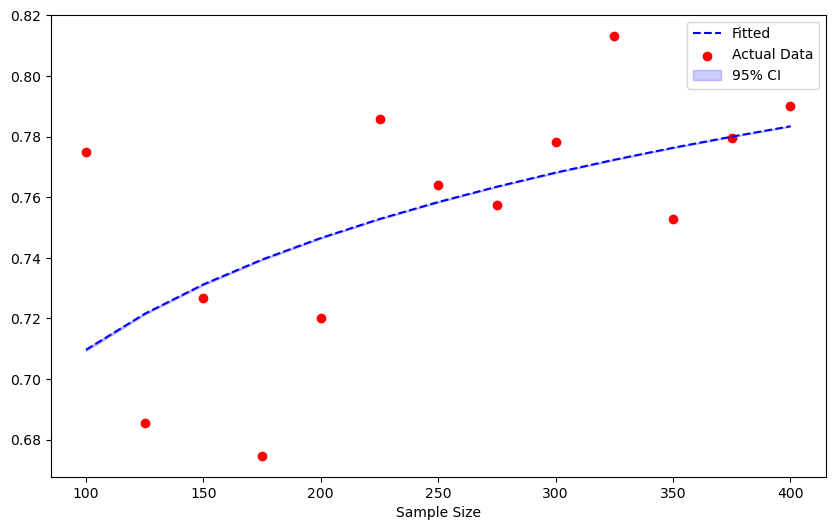

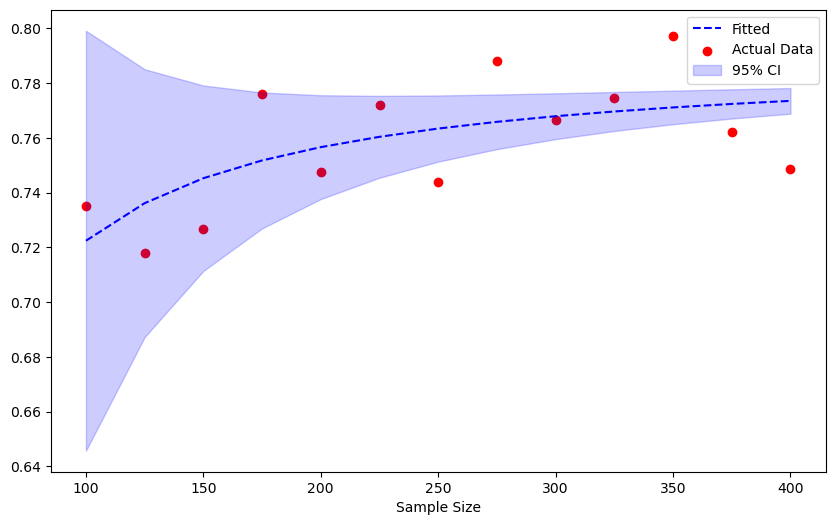

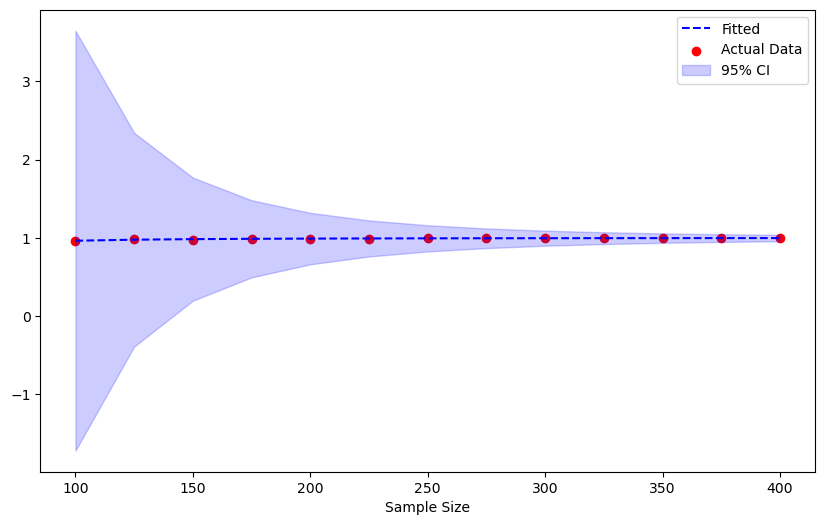

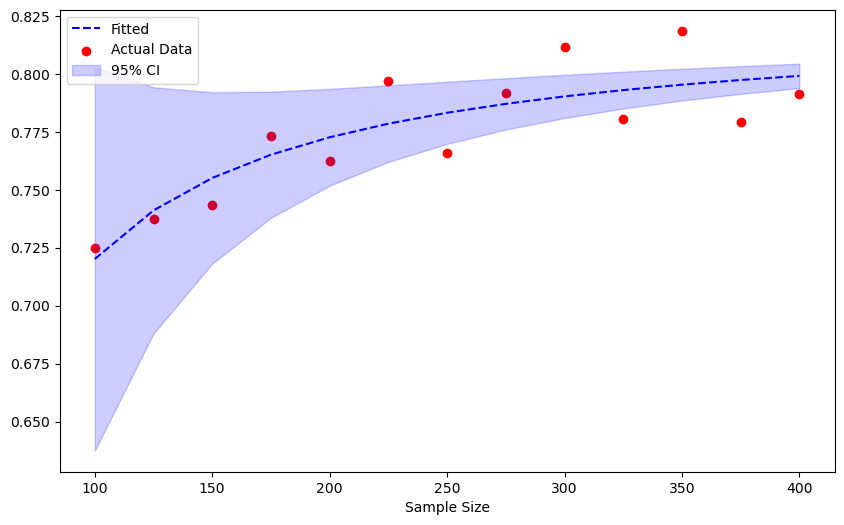

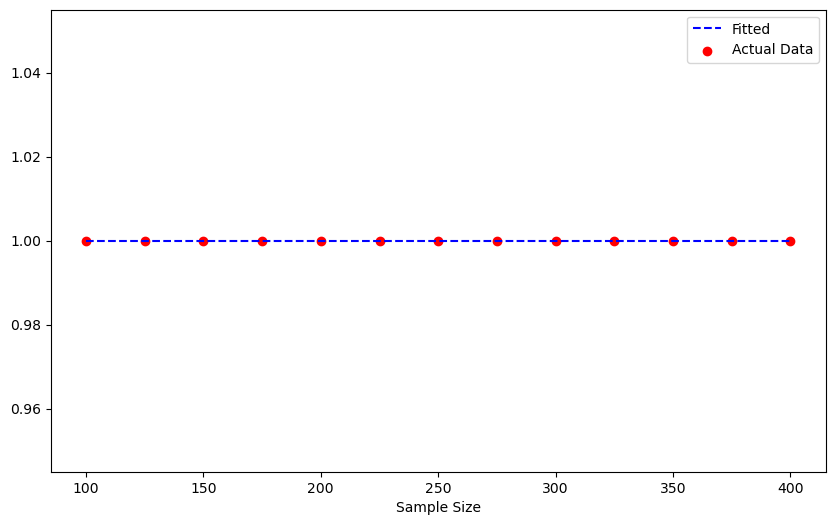

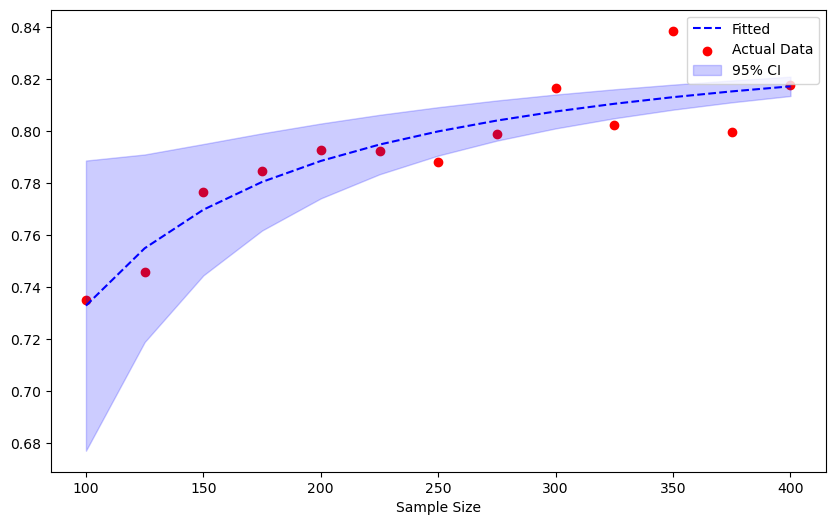

In [8]:
# Visualize the classifier performance
p_acc = vis_classifier(metric_generated=metric_generated,
                       metric_real=metric_real,
                       n_target=n_target)

# Print the plot or result
print(p_acc)